In [1]:
import numpy as np
import matplotlib.pyplot as plt

import response_functions as rf
import response_functions.common as cm

In [5]:
dir(rf)

['Dielectric_Function',
 'Electron_Liquid',
 'Massless_Dirac_Fermions',
 'Massless_Dirac_Fermions_B',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'cm',
 'common',
 'dielectric_constants',
 'hexagonal_boron_nitride',
 'massless_dirac_fermions',
 'parabolic_bands',
 'permittivity_Cai']

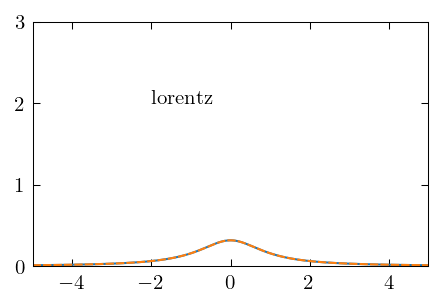

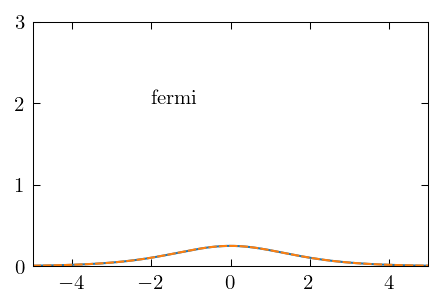

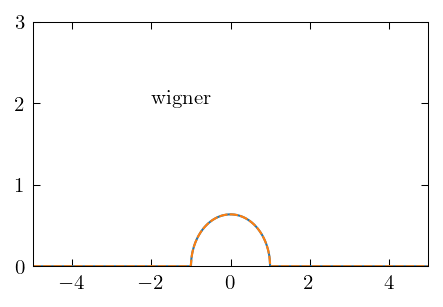

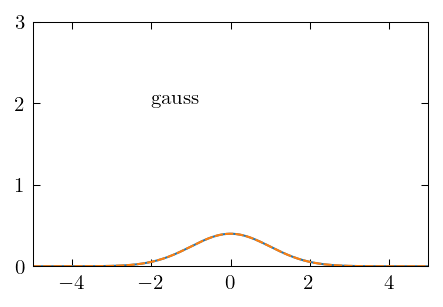

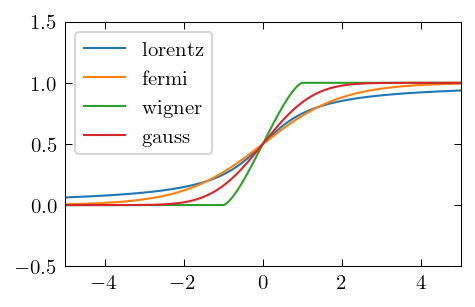

In [2]:
x = np.linspace(-5, 5, 1001)
eta = 1
for i, name in enumerate(["lorentz", "fermi", "wigner", "gauss"]):
    y = cm.theta_function(x, eta, name)
    y1 = np.gradient(y, x)
    yy1 = cm.delta_function(x, eta, name)
    plt.figure(1)
    plt.ylim(-0.5, 1.5)
    plt.plot(x, y, label=name)
    plt.figure(2 + i)
    plt.plot(x, yy1)
    plt.plot(x, y1, "--")
    plt.text(-2, 2, name)
    plt.ylim(0, 3)
plt.figure(1)
plt.legend()

C:\Users\itorre\Dropbox\Physics\python_projects\response_functions\src\response_functions\dielectric_constants.py:38: RuntimeWarning: divide by zero encountered in divide
  return 1 - omega_p / (omega * (omega + 1j * gamma))
C:\Users\itorre\Dropbox\Physics\python_projects\response_functions\src\response_functions\dielectric_constants.py:38: RuntimeWarning: invalid value encountered in divide
  return 1 - omega_p / (omega * (omega + 1j * gamma))


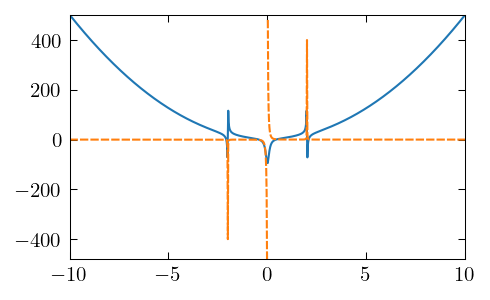

In [3]:
model = [
    {"type": "constant", "parameters": {"constant": 1}},
    {"type": "drude", "parameters": {"omega_p": 1, "gamma": 0.1}},
    {"type": "lorentz", "parameters": {"s": 2, "omega_0": 2, "gamma": 0.01}},
    {"type": "power", "parameters": {"power": 2, "factor": 5}},
]

eps = rf.Dielectric_Function(model)

x = np.linspace(-10, 10, 1001)
plt.plot(x, np.real(eps(x)))
plt.plot(x, np.imag(eps(x)), "--")

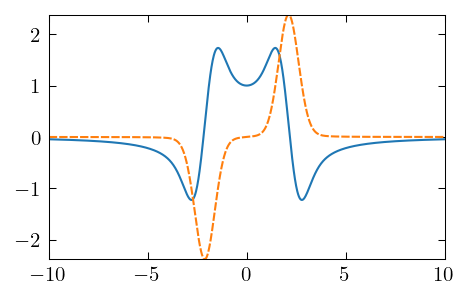

In [4]:
model = [
    {"type": "constant", "parameters": {"constant": 0}},
    {
        "type": "modified_brendel",
        "parameters": {"s": 1, "omega_0": 2, "sigma": 0.5, "gamma": 0.1},
    },
]

eps = rf.Dielectric_Function(model)

x = np.linspace(-10, 10, 1001)
plt.plot(x, np.real(eps(x)))
plt.plot(x, np.imag(eps(x)), "--")